<a href="https://colab.research.google.com/github/akd18/DS-Self-Projects/blob/main/Kaggle%20Competitions/Titanic%20-%20Machine%20Learning%20from%20Disaster/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Colab
!pip install -q kaggle

In [2]:
# For Colab
!mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# For Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# For Colab
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [5]:
# For Colab
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.25MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 6.14MB/s]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# For Kaggle
#train_data_raw = pd.read_csv('../input/titanic/train.csv')
#test_data_raw = pd.read_csv('../input/titanic/test.csv')

In [9]:
train_data_raw = pd.read_csv('train.csv')
test_data_raw = pd.read_csv('test.csv')

In [10]:
train_data_raw.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S


In [11]:
columns_all = train_data_raw.columns
columns_all

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

In [12]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are 891 records and there are missing values in some of the columns.

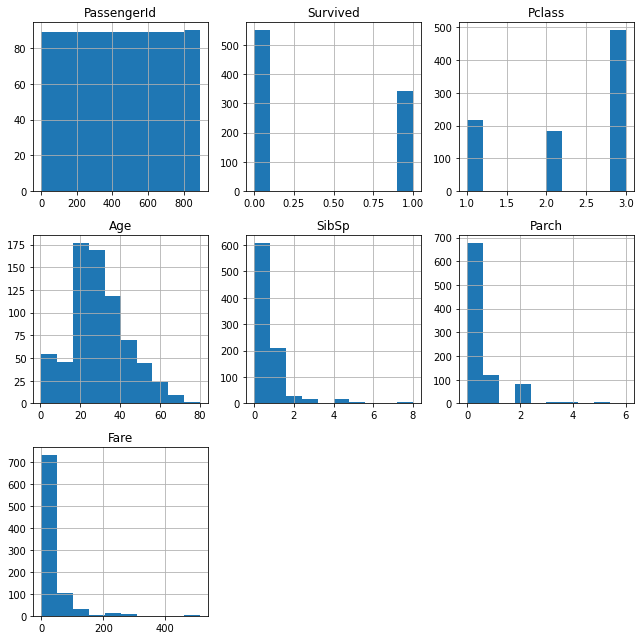

In [13]:
train_data_raw.hist(figsize=(9,9))
plt.tight_layout()

In [14]:
train_data_raw['Survived'].value_counts().apply(lambda x:f'{x} ({x*100/len(train_data_raw):0.2f}%)')

0    549 (61.62%)
1    342 (38.38%)
Name: Survived, dtype: object

Initial Inferences :

- The dataset is mildly imbalanced.
- The columns 'PassengerId' & 'Name' are unique identifiers.
- 'Survived' is the target column that we have to predict.
- The columns 'Pclass', 'Sex' and 'Embarked' are categorical columns and the rest are numerical.
- The column 'SibSp' should ideally be integer value.


We shall split our training data to train-test set before proceeding further to avoid any data leakage into test set.

In [15]:
from sklearn.model_selection import train_test_split

We shall create a copy of train_set so as to not loose the original training set during feature engineering.

In [16]:
train_set,test_set = train_test_split(train_data_raw,test_size=0.2,stratify=train_data_raw['Survived'],random_state=21)

In [17]:
train_original = train_set.copy()
train_set.reset_index(drop=True,inplace=True)

In [18]:
train_set.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
654,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
102,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
390,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
199,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
552,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S


In [19]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,444.730337,0.383427,2.307584,29.806678,0.485955,0.376404,31.756120
std,259.308184,0.486563,0.831550,14.836519,1.025593,0.769609,48.467739
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,218.750000,0.000000,2.000000,20.375000,0.000000,0.000000,7.895800
50%,443.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.931250
75%,668.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.500000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# No. of unique elements in each column
train_set.apply(lambda x: x.nunique())

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             87
SibSp            7
Parch            7
Ticket         569
Fare           226
Cabin          119
Embarked         3
dtype: int64

In [21]:
num_cols = train_set.select_dtypes('number').columns.drop(['PassengerId','Survived','Pclass']).to_numpy()
cat_cols = list(train_set.select_dtypes('object').columns.drop(['Name']))
cat_cols.extend(['Pclass'])
print("Numerical Columns : ",num_cols)
print("Categorical Columns : ",cat_cols)

Numerical Columns :  ['Age' 'SibSp' 'Parch' 'Fare']
Categorical Columns :  ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']


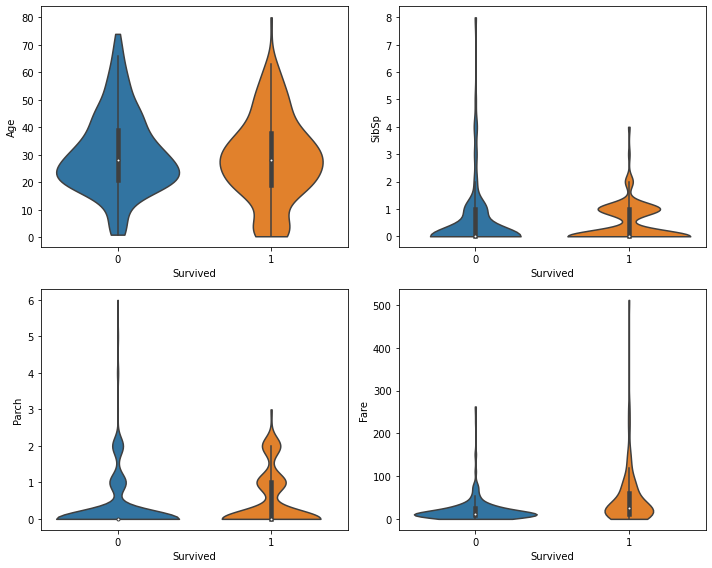

In [22]:
n_def_num_cols = len(num_cols)
fig,ax = plt.subplots(round(n_def_num_cols/2),2,figsize=(10,n_def_num_cols*2))
for i,col in enumerate(num_cols):
  sns.violinplot(x='Survived',y=col,data=train_set,ax=ax.ravel()[i],orient='v',cut=0)
fig.tight_layout()

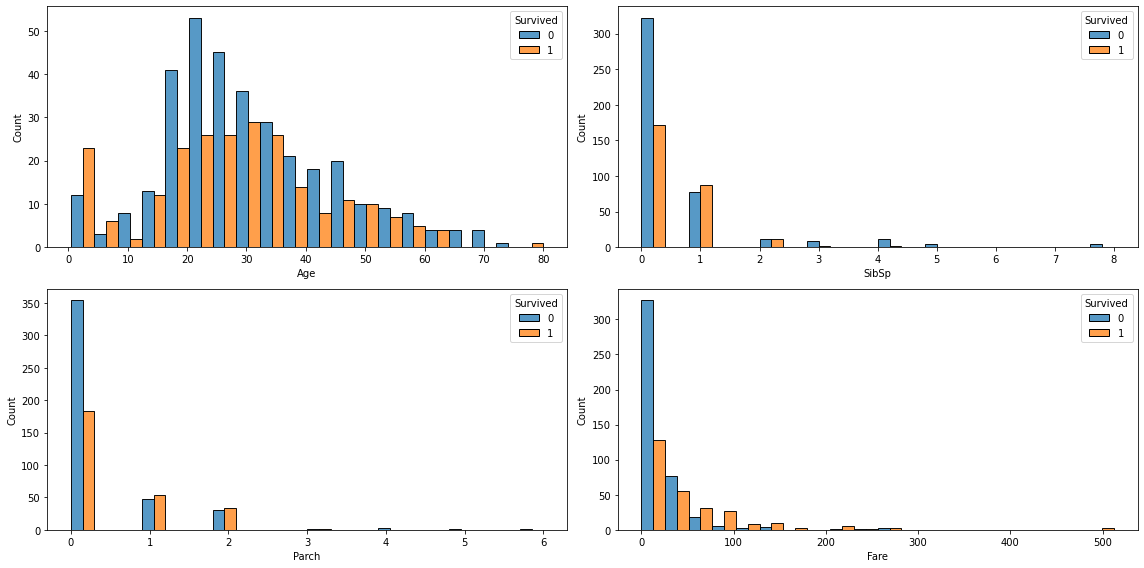

In [23]:
fig,ax = plt.subplots(round(n_def_num_cols/2),2,figsize=(16,n_def_num_cols*2))
for i,col in enumerate(num_cols):
  sns.histplot(x=col,data=train_set,hue='Survived',multiple='dodge',ax=ax.ravel()[i],bins=20,lw=1)
fig.tight_layout()

- We can see that, the survival rate is higher for the kids and elderly. The survial rate for inividuals between 20-30 is very low.
- We could also observe that the chances of survival is increasing with the price paid for the ticket.

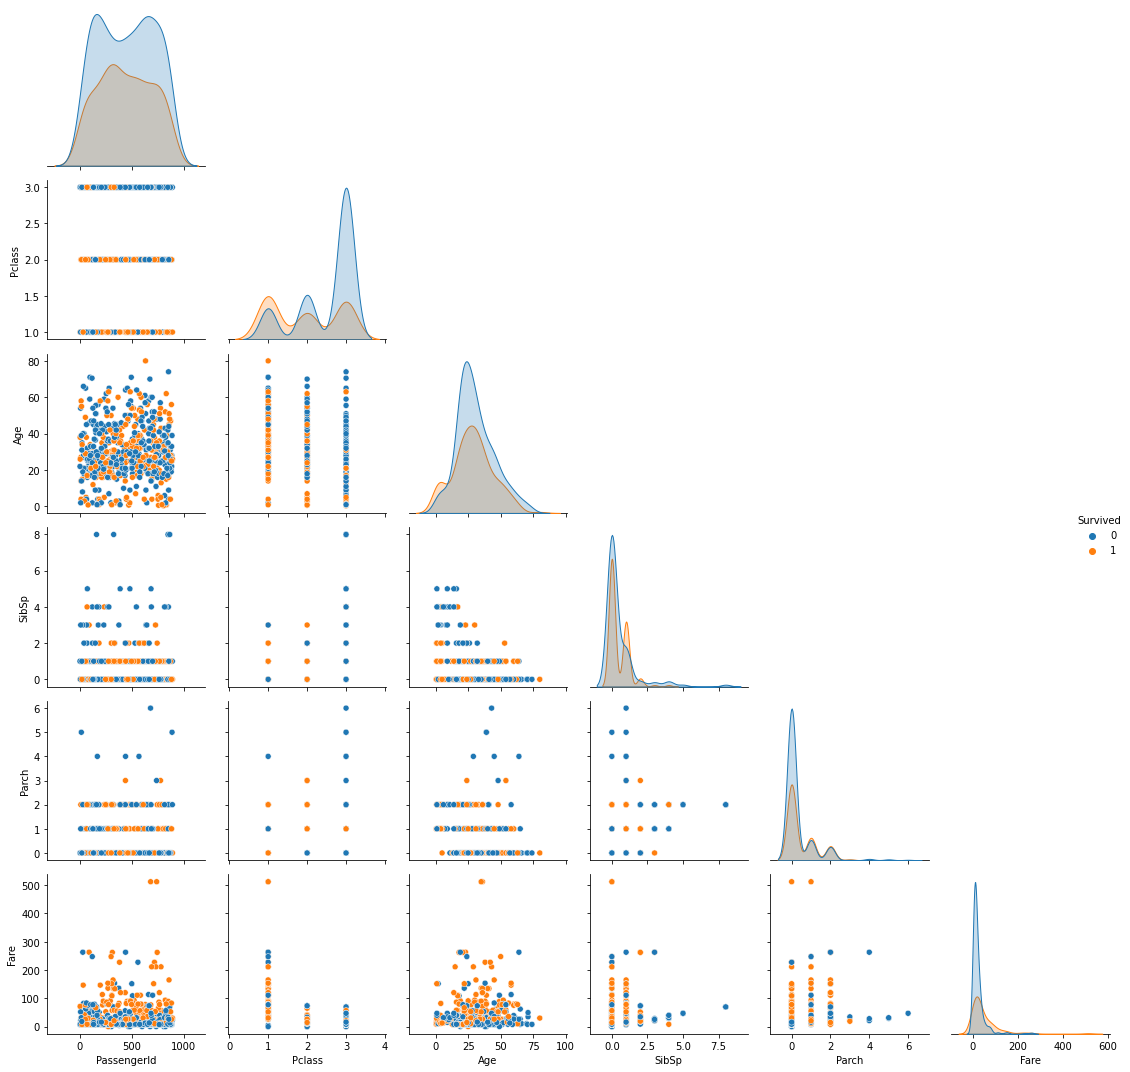

In [24]:
sns.pairplot(hue='Survived',data=train_set,corner=True)
plt.tight_layout()

- The classification of survival isnt linearly seperable with any of the feature.
- There arent any distinct correlation within various features.

In [25]:
train_corr = train_set.corr()

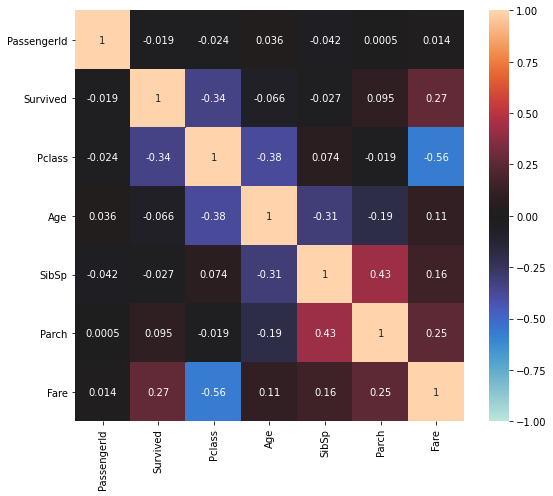

In [26]:
plt.subplots(figsize=(8,7))
sns.heatmap(train_corr,vmax=1,vmin=-1,annot=True,cmap=sns.color_palette("icefire", as_cmap=True))
plt.tight_layout()

In [27]:
print("Correlation of Features with 'Survived' \n")
train_corr.loc[:,'Survived'].sort_values(ascending=False).drop('Survived')

Correlation of Features with 'Survived' 



Fare           0.268678
Parch          0.094806
PassengerId   -0.018821
SibSp         -0.027243
Age           -0.065538
Pclass        -0.340564
Name: Survived, dtype: float64

In [28]:
print("Correlation within Features  \n")
for i,y in enumerate(train_corr.index):
    for j,x in enumerate(train_corr.columns.drop('Survived')):
        if(j<i):
            continue
        if ((train_corr.loc[x,y] >0.4) or (train_corr.loc[x,y] <-0.4)) and x!=y:
            print(f'{x} - {y}  : {train_corr.loc[x,y]}')

Correlation within Features  

Fare - Pclass  : -0.5648039044618131
Parch - SibSp  : 0.42723738370230097


- The Ticket class has the highest correlation with the target column 'Survived'
- The ticket fare and the ticket class are correlated which makes much sense.
- Also the number of siblings/spouses aboard is correlated with the number of parents/children aboard.

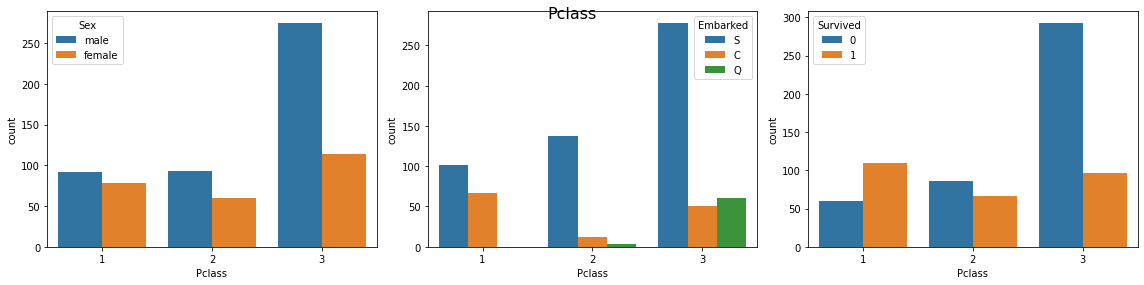

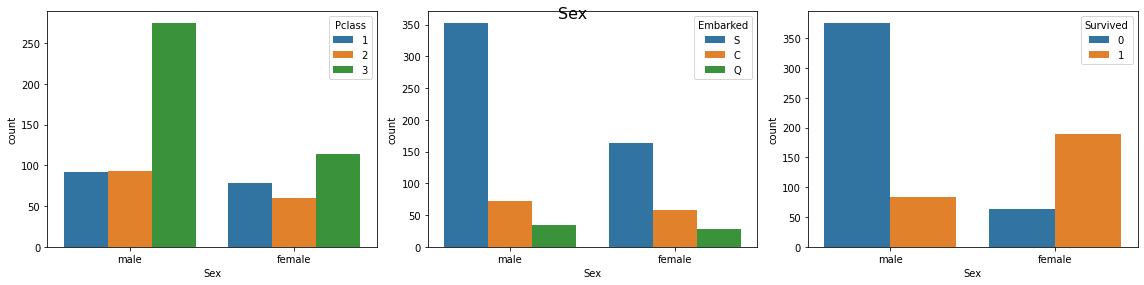

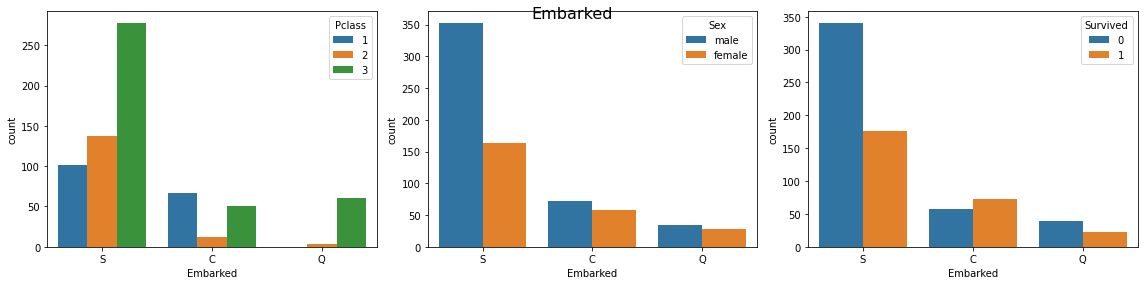

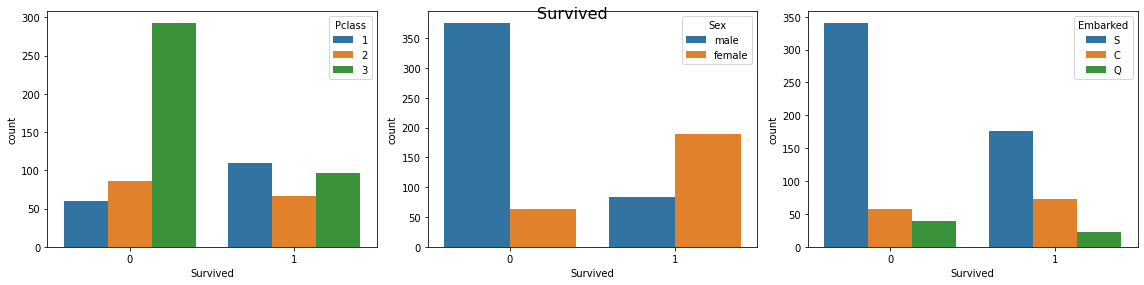

In [29]:
for i,col in enumerate(['Pclass','Sex','Embarked','Survived']):
  j=0
  fig,ax = plt.subplots(1,3,figsize=(16,4),)
  for col1 in ['Pclass','Sex','Embarked','Survived']:
    if col1!=col:    
      sns.countplot(x=col,data=train_set,hue=col1,ax=ax[j])
      j=j+1
  
  fig.suptitle(col,size=16)
  fig.tight_layout()

As we can see, some of the insights that can be drawn are
- The survival chances for females were much higher than males.
- The chances of survival  were higher for Individuals with TicketClass('Pclass')-1. Passengers with Class-1 Ticket has survived more than any other class.
- Passengers who embarked from port Cherbourg has a higher survival ratio.
- Most passengers with 1st class tickets survived and the survival rate was much higher than any other ticket class. It could also be noted that there were no 1st class passengers from Queenstown.
- Passengers embarked from Cherbourg has higher survival ratio.



In [30]:
from scipy.stats import chi2_contingency

In [31]:
alpha = 0.05
for col in cat_cols:
  cross_table = pd.crosstab(train_set[col],train_set['Survived'])
  chi2_stat,p_value, dof, exp = chi2_contingency(cross_table)
  if p_value <= alpha:
    print(f"{col}-Survived \np-value : ",p_value)
    print("Dependent (reject H0)",'\n')
  else:
    print(f"{col}-Survived \np-value : ",p_value)
    print("Independent (fail to reject H0)",'\n')

Sex-Survived 
p-value :  1.277767685540944e-49
Dependent (reject H0) 

Ticket-Survived 
p-value :  0.03529249290136183
Dependent (reject H0) 

Cabin-Survived 
p-value :  0.1860186007157923
Independent (fail to reject H0) 

Embarked-Survived 
p-value :  4.255379308445157e-05
Dependent (reject H0) 

Pclass-Survived 
p-value :  1.1461931253253146e-18
Dependent (reject H0) 



Only 'Cabin' had no relation with 'Survived' column. This could also be due to the unavailability of over 75% of the data for 'Cabin'

# Data Preparation

In [32]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [33]:
# Modifying DataType
#
train_set.loc[:,cat_cols] = train_set[cat_cols].astype('category',errors='ignore')
train_set.loc[:,'PassengerId'] = train_set[['PassengerId']].astype('object',errors='ignore')

In [34]:
def missing_count(data,cols=None):
  print("Number of Instances : ",len(data))
  print("Number of Missing Values in :")
  df = pd.DataFrame(data)
  if cols==None:
    cols=df.columns
  for x in cols:
    count  = df[x].isna().sum()
    if count >=1:
      print(f' - {x} : {count}({count*100/len(df):0.2f}%)')



In [35]:
missing_count(train_set)

Number of Instances :  712
Number of Missing Values in :
 - Age : 140(19.66%)
 - Cabin : 550(77.25%)
 - Embarked : 2(0.28%)


- Embarked has 2 values missing, we could remove the entry/instance since its only 2.
- Age has 140 values missing, which constitutes about 20% of the whole data. We could impute these missing values.
- Cabin has more than 75% of missing values. Ideally we should drop this feature or find some way to extract any available information if possible.

## Feature Engineering

### Feature - 'Embarked '

In [36]:
train_set.dropna(subset=['Embarked'],inplace=True)
train_set.reset_index(drop=True,inplace=True)

We shall impute the missing values in 'Age'. We had noticed that 'Pclass' had the highest correlation with 'Age', so instead of taking the median of the whole training set, we shall impute with class-wise(ticket) median age.

### Feature - 'Age'

In [37]:
pclass_avg_age = train_set.groupby(['Pclass'])['Age'].median()
pclass_avg_age

Pclass
1    38.0
2    30.0
3    24.0
Name: Age, dtype: float64

In [38]:
pd.Series(train_set.columns)

0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
dtype: object

In [39]:
train_set.Age = train_set.apply((lambda x: pclass_avg_age[x[8]] if np.isnan(x[0]) else x[0]),axis=1)

In [40]:
missing_count(train_set)

Number of Instances :  710
Number of Missing Values in :
 - Cabin : 550(77.46%)


'Cabin' has over 77% of its values missing, dropping the column is the ideal choice. But before droping, we shall try to extract any information if possible.

### Feature - 'Cabin'

In [41]:
print("No. of Entries available : ",train_set.Cabin.notna().sum(),'\n')
train_set.Cabin.unique()

No. of Entries available :  160 



[NaN, 'C128', 'C103', 'B35', 'C22 C26', ..., 'C2', 'A26', 'D7', 'E12', 'C125']
Length: 119
Categories (118, object): ['C128', 'C103', 'B35', 'C22 C26', ..., 'A26', 'D7', 'E12', 'C125']

In [42]:
# Checking if all the values in Cabin starts with an alphabet
pd.Series([str(x)[0].isalpha() if x!=np.nan else False for x in train_set.Cabin.unique()]).sum()

119

In [43]:
# Checking if multiple people have the same cabin/s
train_set.Cabin.value_counts()

G6             4
C22 C26        3
C23 C25 C27    3
E101           3
F2             3
              ..
D28            1
D33            1
D36            1
A14            1
B28            0
Name: Cabin, Length: 119, dtype: int64

As we can see, all of 119 unique elements starts with an alphabet. We could group the Cabin codes using this initial alphabet character.

In [44]:
shared_cabins = train_set.Cabin.value_counts()[train_set.Cabin.value_counts()>1].index
shared_cabins

CategoricalIndex(['G6', 'C22 C26', 'C23 C25 C27', 'E101', 'F2', 'B96 B98',
                  'C68', 'D26', 'B49', 'B5', 'B51 B53 B55', 'D35',
                  'B57 B59 B63 B66', 'B58 B60', 'D', 'D20', 'B77', 'B20',
                  'C93', 'C92', 'C65', 'C52', 'C124', 'E121', 'C126', 'E24',
                  'E44', 'F4', 'B18', 'E25', 'F33', 'F G73', 'E33', 'E67',
                  'E8'],
                 categories=['A14', 'A16', 'A19', 'A23', 'A24', 'A26', 'A31', 'A32', ...], ordered=False, dtype='category')

In [45]:
cabins=[]
for x in train_set.Cabin.value_counts().index:
  if ' ' in x:
    cabins.extend(x.split(' '))
  else:
    cabins.append(x)
print(cabins)

['G6', 'C22', 'C26', 'C23', 'C25', 'C27', 'E101', 'F2', 'B96', 'B98', 'C68', 'D26', 'B49', 'B5', 'B51', 'B53', 'B55', 'D35', 'B57', 'B59', 'B63', 'B66', 'B58', 'B60', 'D', 'D20', 'B77', 'B20', 'C93', 'C92', 'C65', 'C52', 'C124', 'E121', 'C126', 'E24', 'E44', 'F4', 'B18', 'E25', 'F33', 'F', 'G73', 'E33', 'E67', 'E8', 'B80', 'B86', 'A23', 'C101', 'C103', 'A19', 'C106', 'C110', 'C111', 'C118', 'C123', 'C125', 'A16', 'A24', 'B78', 'B79', 'A26', 'B22', 'B3', 'B30', 'B35', 'B37', 'B38', 'B39', 'C128', 'B101', 'A7', 'A5', 'A36', 'A34', 'A32', 'B69', 'B73', 'A31', 'B41', 'T', 'C148', 'E36', 'D50', 'D56', 'D7', 'D9', 'E10', 'E12', 'E17', 'E31', 'E34', 'E38', 'C2', 'E40', 'E46', 'E49', 'E58', 'E63', 'E68', 'E77', 'F', 'E69', 'F38', 'D49', 'D48', 'D47', 'D37', 'C30', 'C32', 'C45', 'C47', 'C50', 'C7', 'C70', 'C83', 'C85', 'C87', 'C90', 'C91', 'C99', 'D11', 'D15', 'D17', 'D19', 'D28', 'D33', 'D36', 'A14', 'B28']


In [46]:
cabin_cat = []
cabin_cat.extend([x[0] for x in cabins])
pd.Series(cabin_cat).value_counts()

C    36
B    32
E    23
D    19
A    12
F     6
G     2
T     1
dtype: int64

In [47]:
for cabin_x in set(cabin_cat):
  train_set[f'Cabin_{cabin_x}']=[int(cabin_x in str(x)) for x in train_set.Cabin]

We could also try to group Cabins by the number of passengers in it and also by Cabins with more than 1 passenger as passengers in groups may have higher chance of survival.

In [48]:
# Categories of Cabins with more than 1 passenger.

for cabin_ in shared_cabins:
  train_set[f'Cabin_shared_{cabin_}']=[int(x==cabin_) for x in train_set.Cabin]

In [49]:
passengers_in_cabin = train_set.Cabin.value_counts()[train_set.Cabin.value_counts()>1]
passengers_in_cabin

G6                 4
C22 C26            3
C23 C25 C27        3
E101               3
F2                 3
B96 B98            3
C68                2
D26                2
B49                2
B5                 2
B51 B53 B55        2
D35                2
B57 B59 B63 B66    2
B58 B60            2
D                  2
D20                2
B77                2
B20                2
C93                2
C92                2
C65                2
C52                2
C124               2
E121               2
C126               2
E24                2
E44                2
F4                 2
B18                2
E25                2
F33                2
F G73              2
E33                2
E67                2
E8                 2
Name: Cabin, dtype: int64

In [50]:
for n in passengers_in_cabin.unique():
  train_set[f'{n}_Passenger_Cabin'] =  0
for index,x in enumerate(train_set.Cabin):
  if x in passengers_in_cabin.index:
    n = passengers_in_cabin[x]
    train_set.loc[index,f'{n}_Passenger_Cabin'] =  1

In [51]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_G', 'Cabin_C',
       'Cabin_D', 'Cabin_A', 'Cabin_B', 'Cabin_T', 'Cabin_F', 'Cabin_E',
       'Cabin_shared_G6', 'Cabin_shared_C22 C26', 'Cabin_shared_C23 C25 C27',
       'Cabin_shared_E101', 'Cabin_shared_F2', 'Cabin_shared_B96 B98',
       'Cabin_shared_C68', 'Cabin_shared_D26', 'Cabin_shared_B49',
       'Cabin_shared_B5', 'Cabin_shared_B51 B53 B55', 'Cabin_shared_D35',
       'Cabin_shared_B57 B59 B63 B66', 'Cabin_shared_B58 B60',
       'Cabin_shared_D', 'Cabin_shared_D20', 'Cabin_shared_B77',
       'Cabin_shared_B20', 'Cabin_shared_C93', 'Cabin_shared_C92',
       'Cabin_shared_C65', 'Cabin_shared_C52', 'Cabin_shared_C124',
       'Cabin_shared_E121', 'Cabin_shared_C126', 'Cabin_shared_E24',
       'Cabin_shared_E44', 'Cabin_shared_F4', 'Cabin_shared_B18',
       'Cabin_shared_E25', 'Cabin_shared_F33', 'Cabin_shared_F G73',
       'Cabin_shar

We shall create a method to do the above done cleaning tasks

In [52]:
def clean_data(X):

    # Modifying DataType
    X.loc[:,cat_cols] = X[cat_cols].astype('category',errors='ignore')
    X.loc[:,'PassengerId'] = X[['PassengerId']].astype('object',errors='ignore')
    X.loc[:,num_cols] = X[num_cols].apply(lambda x: pd.to_numeric(x,errors='coerce'),axis=1)
    
    #Dropping Missing values in Embarked
    X.dropna(subset=['Embarked'],inplace=True)

    # Imputing Missing values in Age
    X.Age = X.apply((lambda x: pclass_avg_age[x[8]] if np.isnan(x[0]) else x[0]),axis=1)

    X = X.reset_index(drop=True)

    if 'Survived' in X:
      y = X.Survived
      X = X.drop(['Survived'],axis=1)

      return X,y
    else:
      return X


We could follow a similar approach to 'Ticket' as in 'Cabin'. We shall try to extract any useful information possible from Ticket column.

### Feature - 'Ticket'

In [53]:
train_set.Ticket.nunique()

568

In [54]:
train_set.Ticket.head(25)

0            S.P. 3464
1            Fa 265302
2     C.A./SOTON 34068
3               350035
4               349242
5                29750
6               113510
7               113783
8             PC 17477
9                 2699
10              349253
11              364498
12              113781
13              349251
14              345779
15              248727
16              349909
17               26707
18              347085
19              330932
20              248738
21            PC 17757
22              345764
23               16966
24              229236
Name: Ticket, dtype: category
Categories (569, object): ['110152', '110413', '110465', '110564', ..., 'W./C. 6608', 'W.E.P. 5734',
                           'W/C 14208', 'WE/P 5735']

In [55]:
# Checking if the initial text in String are random/unique or if it has any significance
pd.Series([str(x).split(' ')[0] if ' ' in str(x) else x for x in train_set.Ticket]).value_counts()

PC        46
C.A.      21
A/5        9
STON/O     9
W./C.      7
          ..
345770     1
19877      1
349217     1
349910     1
349256     1
Length: 466, dtype: int64

The tickets seems much more random at first glance apart from the fact that they are mostly numerical or numericals preceeded by some text. Individuals travelling together will have the same ticket code.

In [56]:
ticket_codes=[]
for x in train_set.Ticket.value_counts().index:
  if ' ' in x:
    ticket_codes.append(x.split(' ')[0])
print(ticket_codes)

['CA', 'CA.', 'S.O.C.', 'PC', 'PC', 'F.C.C.', 'W./C.', 'C.A.', 'A/5.', 'C.A.', 'C.A.', 'C.A.', 'A/4', 'PC', 'PC', 'PC', 'SC/Paris', 'S.O./P.P.', 'PP', 'PC', 'PC', 'PC', 'S.C./PARIS', 'W./C.', 'PC', 'PC', 'WE/P', 'PC', 'A/5.', 'A4.', 'C', 'C', 'C', 'C', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A.', 'C.A./SOTON', 'CA.', 'F.C.C.', 'F.C.C.', 'Fa', 'P/PP', 'PC', 'PC', 'PC', 'PC', 'A/5.', 'A/5.', 'A/5.', 'A./5.', 'A./5.', 'A.5.', 'A/5', 'A.5.', 'A/4', 'A/4.', 'A/4.', 'A/4.', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'A/5', 'PC', 'PC', 'PC', 'SOTON/O.Q.', 'SOTON/O.Q.', 'SOTON/O.Q.', 'SOTON/O.Q.', 'SOTON/O2', 'SOTON/O2', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/OQ', 'SOTON/OQ', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O', 'STON/O2.', 'STON/O2.', 'STON/O2.', 'STON/O2.', 'STON/O2.', 'SW/PP', 'W./C.', 'W./C.', 'W.E.P.', 'SOTON/O.Q.', 'SOTON/O.Q.', 'SO/C', 'PC', 'PC', 'PC', 'PC', 'PC', '

In [57]:
ticket_codes = [x.replace('.','') for x in ticket_codes]
ticket_pattern_uniq = pd.Series(ticket_codes).unique()
pd.Series(ticket_codes).value_counts()

PC          34
CA          20
A/5         16
SOTON/OQ    11
STON/O       9
A/4          5
W/C          5
STON/O2      5
SC/PARIS     4
C            4
FCC          3
SW/PP        2
A5           2
SOTON/O2     2
SC/Paris     2
PP           2
SO/PP        2
WE/P         1
SO/C         1
SP           1
SC/A4        1
WEP          1
P/PP         1
CA/SOTON     1
Fa           1
SCO/W        1
SOP          1
A4           1
SC/AH        1
SC           1
SOC          1
dtype: int64

In [58]:
for x in ticket_pattern_uniq:
  train_set['Ticket_'+x] = [int(x == str(y).split(' ')[0].replace('.','')) for y in train_set.Ticket]

In [59]:
shared_tickets = train_set.Ticket.value_counts()[train_set.Ticket.value_counts()>1]
shared_tickets

1601        5
347082      5
CA 2144     5
113781      4
CA. 2343    4
           ..
12749       2
110465      2
PC 17582    2
PC 17572    2
13507       2
Name: Ticket, Length: 103, dtype: int64

In [60]:
for n in shared_tickets.unique():
  train_set[f'{n}_Passenger_Ticket'] =  0
for index,x in enumerate(train_set.Ticket):
  if x in shared_tickets.index:
    n = shared_tickets[x]
    train_set.loc[index,f'{n}_Passenger_Ticket'] =  1

In [61]:
train_set.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_G,Cabin_C,Cabin_D,Cabin_A,Cabin_B,Cabin_T,Cabin_F,Cabin_E,Cabin_shared_G6,Cabin_shared_C22 C26,Cabin_shared_C23 C25 C27,Cabin_shared_E101,Cabin_shared_F2,Cabin_shared_B96 B98,Cabin_shared_C68,Cabin_shared_D26,Cabin_shared_B49,Cabin_shared_B5,Cabin_shared_B51 B53 B55,Cabin_shared_D35,Cabin_shared_B57 B59 B63 B66,Cabin_shared_B58 B60,Cabin_shared_D,Cabin_shared_D20,Cabin_shared_B77,Cabin_shared_B20,Cabin_shared_C93,Cabin_shared_C92,...,Cabin_shared_E67,Cabin_shared_E8,4_Passenger_Cabin,3_Passenger_Cabin,2_Passenger_Cabin,Ticket_CA,Ticket_SOC,Ticket_PC,Ticket_FCC,Ticket_W/C,Ticket_A/5,Ticket_A/4,Ticket_SC/Paris,Ticket_SO/PP,Ticket_PP,Ticket_SC/PARIS,Ticket_WE/P,Ticket_A4,Ticket_C,Ticket_CA/SOTON,Ticket_Fa,Ticket_P/PP,Ticket_A5,Ticket_SOTON/OQ,Ticket_SOTON/O2,Ticket_STON/O,Ticket_STON/O2,Ticket_SW/PP,Ticket_WEP,Ticket_SO/C,Ticket_SCO/W,Ticket_SC/A4,Ticket_SOP,Ticket_SP,Ticket_SC,Ticket_SC/AH,5_Passenger_Ticket,4_Passenger_Ticket,3_Passenger_Ticket,2_Passenger_Ticket
384,882,0,3,"Markun, Mr. Johann",male,882,0,0,349257,7.8958,NaN,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
436,365,0,3,"O'Brien, Mr. Thomas",male,365,1,0,370365,15.5000,NaN,Q,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
244,266,0,2,"Reeves, Mr. David",male,266,0,0,C.A. 17248,10.5000,NaN,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,868,0,1,"Roebling, Mr. Washington Augustus II",male,868,0,0,PC 17590,50.4958,A24,S,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
571,515,0,3,"Coleff, Mr. Satio",male,515,0,0,349209,7.4958,NaN,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature - 'PassengerId'

In [62]:
train_set['PassengerId']

0       68
1      155
2      884
3      500
4      520
      ... 
705    575
706    248
707    189
708    329
709    207
Name: PassengerId, Length: 710, dtype: object

- PassengerId column contains unique integer values only, no useful information can be extracted from them. Dropping is ideal.

In [63]:
train_set['Name']

0                            Crease, Mr. Ernest James
1                               Olsen, Mr. Ole Martin
2                       Banfield, Mr. Frederick James
3                                  Svensson, Mr. Olof
4                                 Pavlovic, Mr. Stefo
                            ...                      
705                      Rush, Mr. Alfred George John
706                   Hamalainen, Mrs. William (Anna)
707                                  Bourke, Mr. John
708    Goldsmith, Mrs. Frank John (Emily Alice Brown)
709                        Backstrom, Mr. Karl Alfred
Name: Name, Length: 710, dtype: object

- For passenger 'Name', all seems to have a 'Title'.

In [64]:
train_set['Title'] = train_set['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
print(train_set['Title'].unique())
train_set['Title'].nunique()

['Mr' 'Mrs' 'Miss' 'Mlle' 'Master' 'Dr' 'Major' 'Rev' 'Lady'
 'the Countess' 'Don' 'Jonkheer' 'Ms' 'Col']


14

- All passengers have a title in their name and to be specific there are 14 titles. 
- Mlle is French for Ms, so we shall replace this.

In [65]:
train_set['Title'] = train_set['Title'].replace(['Mlle'],['Ms'])
print(train_set['Title'].unique())
train_set['Title'].nunique()

['Mr' 'Mrs' 'Miss' 'Ms' 'Master' 'Dr' 'Major' 'Rev' 'Lady' 'the Countess'
 'Don' 'Jonkheer' 'Col']


13

In [66]:
pd.crosstab(train_set['Survived'],train_set['Title'])

Title,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mr,Mrs,Ms,Rev,the Countess
Survived,,,,,,,,,,,,,
0,1,1,3,1,0,1,12,41,352,22,0,5,0
1,1,0,0,0,1,0,17,102,66,80,3,0,1


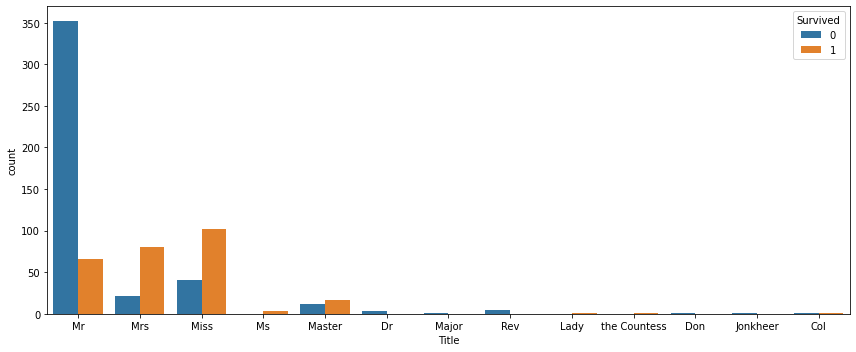

In [67]:
fig,ax = plt.subplots(figsize=(12,5))
sns.countplot(hue='Survived',data=train_set,x='Title',)
plt.tight_layout()

We could also add a feature of Family Size

### Feature - 'SibSp' & 'Parch'

In [68]:
train_set['FamilySize'] = train_set.SibSp +	train_set.Parch
train_set['FamilySize'].unique()

array([ 0,  2,  3,  4,  1,  5, 10,  7,  6])

We have now extracted information from the features 'Cabin','Ticket' and 'Name' and now we shall drop these columns along with 'PassengerId'.


In [69]:
train_set.drop(['Cabin','Ticket','PassengerId','Name'],axis=1,inplace=True)

In [70]:
cat_cols_updated = list(cat_cols)
cat_cols_updated.append('Title')
num_cols_updated = list(num_cols)
num_cols_updated.append('FamilySize')

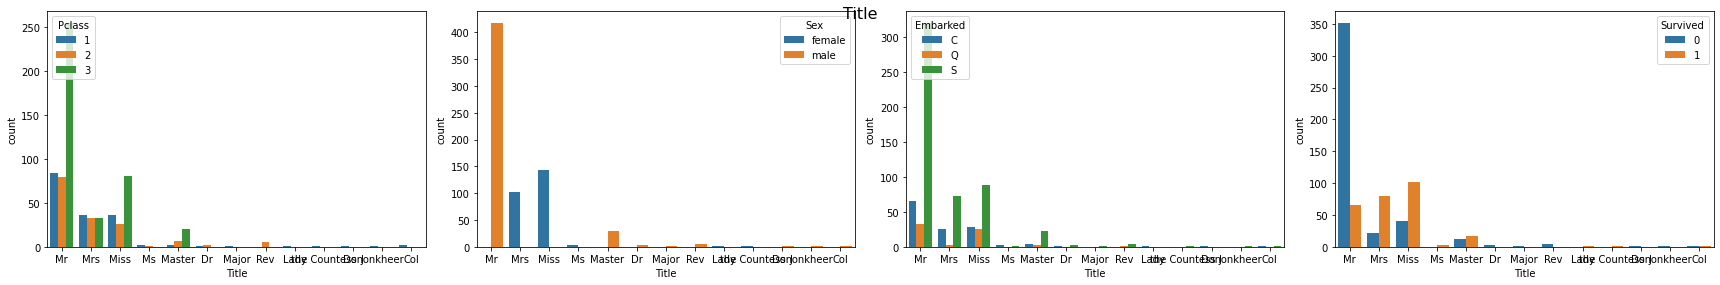

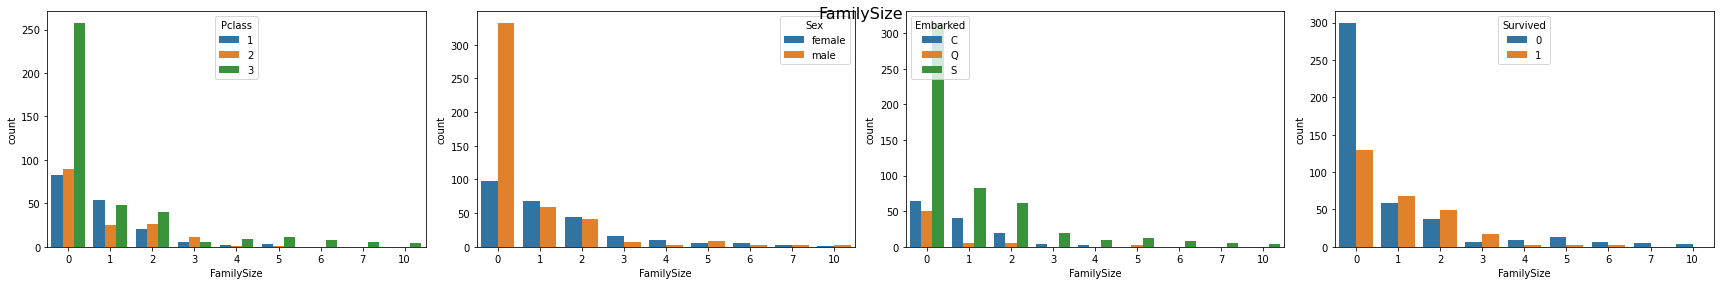

In [71]:
for i,col in enumerate(['Title','FamilySize']):
  j=0
  fig,ax = plt.subplots(1,4,figsize=(24,4),)
  for col1 in ['Pclass','Sex','Embarked','Survived']:
      sns.countplot(x=col,data=train_set,hue=col1,ax=ax[j])
      j=j+1
  
  fig.suptitle(col,size=16)
  fig.tight_layout()

We will create a Custom Transformer to extract/create new features

In [72]:
from sklearn.base import TransformerMixin,BaseEstimator

In [73]:
class FeatureEngineering(TransformerMixin,BaseEstimator):

  def __init__(self):
    self
  
  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):

    X = X.reset_index(drop=True)

    # Creating Feature 'Title'
    X['Title'] = X['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
    X['Title'] = X['Title'].replace(['Mlle'],['Ms'])

    # Creating Feature 'FamilySize'
    X['FamilySize'] = X.SibSp +	X.Parch


    #cabins=[]
    #cabin_cat = []
    #for x in X.Cabin.value_counts().index:
    #  if ' ' in x:
    #    cabins.extend(x.split(' '))
    #  else:
    #    cabins.append(x)
    #cabin_cat.extend([x[0] for x in cabins])
    for cabin_x in set(cabin_cat):
      X[f'Cabin_{cabin_x}']=[int(cabin_x in str(x)) for x in X.Cabin]

    #shared_cabins = X.Cabin.value_counts()[X.Cabin.value_counts()>1].index
    for cabin_ in shared_cabins:
      X[f'Cabin_shared_{cabin_}']=[int(x==cabin_) for x in X.Cabin]

    #passengers_in_cabin = X.Cabin.value_counts()[X.Cabin.value_counts()>1]
    for n in passengers_in_cabin.unique():
      X[f'{n}_Passenger_Cabin'] =  0
    for index,x in enumerate(X.Cabin):
      if x in passengers_in_cabin.index:
        n = passengers_in_cabin[x]
        X.loc[index,f'{n}_Passenger_Cabin'] =  1


    #ticket_codes=[]
    #for x in X.Ticket.value_counts().index:
    #  if ' ' in x:
    #    ticket_codes.append(x.split(' ')[0])
    #ticket_codes = [x.replace('.','') for x in ticket_codes]
    #ticket_pattern_uniq = pd.Series(ticket_codes).unique()
    for x in ticket_pattern_uniq:
      X['Ticket_'+x] = [int(x == str(y).split(' ')[0].replace('.','')) for y in X.Ticket]

    for ticket_ in shared_tickets.index:
      X[f'Ticket_shared_{ticket_}']=[int(x==ticket_) for x in X.Ticket]

    #shared_tickets = X.Ticket.value_counts()[X.Ticket.value_counts()>1]
    for n in shared_tickets.unique():
      X[f'{n}_Passenger_Ticket'] =  0
    for index,x in enumerate(X.Ticket):
      if x in shared_tickets.index:
        n = shared_tickets[x]
        X.loc[index,f'{n}_Passenger_Ticket'] =  1

    X = X.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1)

    return X


In [74]:
# A custom transformer to view the data inbetween the various stages of the pipeline
class TransformationSubStage(TransformerMixin,BaseEstimator):

  def __init__(self):
    self
    self.transformed_X = None
    self.transformed_y = None
  
  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    self.transformed_X = X
    self.transformed_y = y
    return X

## Building a Pipeline

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [76]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [77]:
sub_pipe1 = Pipeline([
                      ('imputer',SimpleImputer(strategy='most_frequent')),
                      (('ohe',OneHotEncoder(handle_unknown='ignore')))
])

In [78]:
coltransformer = ColumnTransformer([
                                    ('num_impute',SimpleImputer(strategy='median'),['Age', 'SibSp', 'Parch', 'FamilySize']),
                                    ('num_impute2',SimpleImputer(strategy='mean'),['Fare']),
                                    ('cat_impute',sub_pipe1,['Sex', 'Embarked', 'Pclass', 'Title'])
],remainder='passthrough')

In [79]:
pipe = Pipeline([
                 ('feat_engg',FeatureEngineering()),
                 ('substage_feat_engg',TransformationSubStage()),
                 ('coltransformer',coltransformer),
                 ('substage_coltransformer',TransformationSubStage()),
                 ('num',StandardScaler()),
])

In [80]:
X_train,y_train = clean_data(train_original)
X_train = pipe.fit_transform(X_train)

In [81]:
X_train.shape

(710, 210)

In [82]:
X_test,y_test = clean_data(test_set)
X_test = pipe.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

In [86]:
models = {}

# ML Modeling

### Logistic Regression

In [87]:
logreg_gridSearch = LogisticRegressionCV(solver='saga',penalty='elasticnet',Cs=[0.1,0.2,0.5,1,10,15,20,25,50,100,100],l1_ratios=[0,0.35,0.5,0.65,1],n_jobs=-1,cv=3,random_state=0)
logreg_gridSearch.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.1, 0.2, 0.5, 1, 10, 15, 20, 25, 50, 100, 100],
                     class_weight=None, cv=3, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=[0, 0.35, 0.5, 0.65, 1],
                     max_iter=100, multi_class='auto', n_jobs=-1,
                     penalty='elasticnet', random_state=0, refit=True,
                     scoring=None, solver='saga', tol=0.0001, verbose=0)

In [88]:
logreg = LogisticRegression(solver='saga',penalty='elasticnet',C=logreg_gridSearch.C_[0],l1_ratio=logreg_gridSearch.l1_ratio_[0],n_jobs=-1,random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.65, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
accuracy = accuracy_score(y_test,logreg.predict(X_test))
accuracy

0.8379888268156425

In [90]:
models['Logistic Regression'] = accuracy

### Linear SVC

In [91]:
params ={'C':[0.01,0.1,1,2,5,10,20,50,100,1000],
         'penalty':['l1','l2']}
lin_svc = GridSearchCV(LinearSVC(random_state=0),params)

In [92]:
lin_svc.fit(X_train,y_train)
lin_svc.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [93]:
lin_svc = lin_svc.best_estimator_

In [94]:
accuracy = accuracy_score(y_test,lin_svc.predict(X_test))
accuracy

0.8324022346368715

In [95]:
models['Linear SVC'] = accuracy

### SVC

In [96]:
params ={'C':[0.01,0.1,1,2,5,10,20,50,100,1000],
         'kernel':['rbf','sigmoid']}
svc = GridSearchCV(SVC(random_state =0,probability=True),params)

In [97]:
svc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10, 20, 50, 100, 1000],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
svc.best_params_

{'C': 2, 'kernel': 'sigmoid'}

In [99]:
svc = svc.best_estimator_

In [100]:
accuracy = accuracy_score(y_test,svc.predict(X_test))
accuracy

0.8379888268156425

In [101]:
models['SVC'] = accuracy

### Decision Tree Classifier

In [102]:
dt_clf = DecisionTreeClassifier(random_state =0)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [103]:
accuracy = accuracy_score(y_test,dt_clf.predict(X_test))
accuracy

0.7597765363128491

In [104]:
models['Decision Tree'] = accuracy

### Random Forest Classifier (Ensemble)

In [105]:
!pip install -q optuna

     |████████████████████████████████| 302 kB 5.0 MB/s 
     |████████████████████████████████| 208 kB 44.1 MB/s 
     |████████████████████████████████| 80 kB 6.8 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 111 kB 58.6 MB/s 
     |████████████████████████████████| 141 kB 49.7 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 


In [106]:
import optuna

In [107]:
def objective(trial):

  max_features=trial.suggest_float('max_features',0.3,1,step=0.05)
  max_samples=trial.suggest_float('max_samples',0.3,0.95,step=0.05)
  min_samples_split=trial.suggest_float('min_samples_split',0.01,0.11,step=0.01)
  class_weight=trial.suggest_categorical('class_weight',['balanced', 'balanced_subsample',None])

  clf = RandomForestClassifier(max_features=max_features, max_samples=max_samples, min_samples_split=min_samples_split,class_weight=class_weight,random_state =0)

  return cross_val_score(clf,X_train,y_train,cv=3,n_jobs=-1,scoring='accuracy').mean()

In [108]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)

[I 2021-08-31 09:53:36,707] A new study created in memory with name: no-name-5d346100-aac6-4608-931d-3a5334dba8b2
[I 2021-08-31 09:53:38,871] Trial 0 finished with value: 0.8182614603447043 and parameters: {'max_features': 0.8500000000000001, 'max_samples': 0.65, 'min_samples_split': 0.09, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8182614603447043.
[I 2021-08-31 09:53:39,637] Trial 1 finished with value: 0.8295370569024291 and parameters: {'max_features': 1.0, 'max_samples': 0.5, 'min_samples_split': 0.03, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.8295370569024291.
[I 2021-08-31 09:53:40,336] Trial 2 finished with value: 0.8365932441774536 and parameters: {'max_features': 0.8500000000000001, 'max_samples': 0.5, 'min_samples_split': 0.01, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8365932441774536.
[I 2021-08-31 09:53:41,106] Trial 3 finished with value: 0.8309554458985912 and parameters: {'max_features': 0.55, 'max_samples': 0

In [109]:
best_trial = study.best_trial
print("Accuracy : ",best_trial.value)
best_trial.params

Accuracy :  0.8365932441774536


{'class_weight': 'balanced',
 'max_features': 0.8500000000000001,
 'max_samples': 0.5,
 'min_samples_split': 0.01}

In [110]:
rf_clf = RandomForestClassifier(**best_trial.params,random_state =0)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None,
                       max_features=0.8500000000000001, max_leaf_nodes=None,
                       max_samples=0.5, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [111]:
accuracy = accuracy_score(y_test,rf_clf.predict(X_test))
accuracy

0.8268156424581006

In [112]:
models['Random Forest'] = accuracy

### K-Nearest Neighbor Classifier

In [113]:
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}
knn_clf = GridSearchCV(KNeighborsClassifier(), params)

In [114]:
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
knn_clf.best_params_

{'n_neighbors': 5}

In [116]:
accuracy = accuracy_score(y_test,knn_clf.predict(X_test))
accuracy

0.7932960893854749

In [117]:
models['K-Nearest Neighbor'] = accuracy

### Gaussian Naive Bayes Classifier

In [118]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_clf = GridSearchCV(GaussianNB(), params)

In [119]:
nb_clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02,...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [120]:
nb_clf.best_params_

{'var_smoothing': 0.0657933224657568}

In [121]:
accuracy = accuracy_score(y_test,nb_clf.predict(X_test))
accuracy

0.659217877094972

In [122]:
models['Gaussian Naive Bayes'] = accuracy

In [123]:
import xgboost as xgb

In [124]:
cv = cross_val_score(xgb.XGBClassifier(),X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82394366 0.8028169  0.85915493 0.82394366 0.79577465]
0.8211267605633804


In [125]:
tst = xgb.XGBClassifier().fit(X_train,y_train)
accuracy_score(y_test,tst.predict(X_test))

0.8100558659217877

In [126]:
n_iter = []
def objective_xgb(trial):

  params = {
      'learning_rate' : trial.suggest_loguniform('learning_rate',1e-8,0.5),
      'max_depth' : trial.suggest_int('max_depth',8,33),
      'subsample' : trial.suggest_float('subsample',0.5,1),
      'colsample_bynode' : trial.suggest_float('colsample_bynode',0.5,1),
      'lambda' : trial.suggest_loguniform("lambda", 1e-8, 1.0),
      'alpha': trial.suggest_loguniform("alpha", 1e-8, 1.0),
      'gamma' : trial.suggest_loguniform("gamma", 1e-8, 1.0),
                
      'objective':'binary:logistic','random_state':0
  }
  
  dtrain = xgb.DMatrix(X_train,y_train)


  cv = xgb.cv(params, dtrain, num_boost_round=1000, metrics='auc', early_stopping_rounds=50)
  n_iter.append(len(cv))

  return cv.mean()['test-auc-mean']

In [127]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb,n_trials=750)

[I 2021-08-31 09:54:26,708] A new study created in memory with name: no-name-bd05ce50-88b6-4b70-9a32-e994987ef0f1
[I 2021-08-31 09:54:30,046] Trial 0 finished with value: 0.86520999376947 and parameters: {'learning_rate': 3.8730670267463e-05, 'max_depth': 29, 'subsample': 0.9604985561312416, 'colsample_bynode': 0.7558236036144281, 'lambda': 2.6380198766450268e-08, 'alpha': 3.591578995170542e-05, 'gamma': 0.0005282920899130948}. Best is trial 0 with value: 0.86520999376947.
[I 2021-08-31 09:54:31,964] Trial 1 finished with value: 0.8704657652582163 and parameters: {'learning_rate': 7.930273985845068e-06, 'max_depth': 9, 'subsample': 0.8274060173418119, 'colsample_bynode': 0.6965595572342199, 'lambda': 1.1871140033685547e-06, 'alpha': 1.4159237157318935e-07, 'gamma': 0.01837634196552444}. Best is trial 1 with value: 0.8704657652582163.
[I 2021-08-31 09:54:33,199] Trial 2 finished with value: 0.8731925507246376 and parameters: {'learning_rate': 3.0781724935329367e-07, 'max_depth': 29, 'su

In [128]:
best_trial = study.best_trial
print("Accuracy : ",best_trial.value)
best_trial.params

Accuracy :  0.8839213749999999


{'alpha': 0.7106327468019231,
 'colsample_bynode': 0.541837493141394,
 'gamma': 0.0006682094454222533,
 'lambda': 0.008570534913246301,
 'learning_rate': 8.472012061901395e-06,
 'max_depth': 18,
 'subsample': 0.9461093401611914}

In [129]:
n_iter[best_trial.number]

16

In [130]:
xgb_clf = xgb.XGBClassifier(**best_trial.params,n_estimators=n_iter[best_trial.number],random_state =0)
xgb_clf

XGBClassifier(alpha=0.7106327468019231, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=0.541837493141394,
              colsample_bytree=1, gamma=0.0006682094454222533,
              lambda=0.008570534913246301, learning_rate=8.472012061901395e-06,
              max_delta_step=0, max_depth=18, min_child_weight=1, missing=None,
              n_estimators=16, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9461093401611914, verbosity=1)

In [131]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(alpha=0.7106327468019231, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=0.541837493141394,
              colsample_bytree=1, gamma=0.0006682094454222533,
              lambda=0.008570534913246301, learning_rate=8.472012061901395e-06,
              max_delta_step=0, max_depth=18, min_child_weight=1, missing=None,
              n_estimators=16, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9461093401611914, verbosity=1)

In [132]:
accuracy = accuracy_score(y_test,xgb_clf.predict(X_test))
accuracy

0.8044692737430168

In [133]:
models['XGBoost'] = accuracy

In [134]:
models

{'Decision Tree': 0.7597765363128491,
 'Gaussian Naive Bayes': 0.659217877094972,
 'K-Nearest Neighbor': 0.7932960893854749,
 'Linear SVC': 0.8324022346368715,
 'Logistic Regression': 0.8379888268156425,
 'Random Forest': 0.8268156424581006,
 'SVC': 0.8379888268156425,
 'XGBoost': 0.8044692737430168}

### AdaBoost Classifier (Ensemble)

In [135]:
adaboost_base = AdaBoostClassifier(random_state=0)
adaboost_base.fit(X_train,y_train)
accuracy = accuracy_score(y_test,adaboost_base.predict(X_test))
accuracy

0.8324022346368715

In [136]:
def objective_adaboost(trial):

  params = {
      'n_estimators':trial.suggest_int('n_estimators',2,200),
      'learning_rate' : trial.suggest_loguniform('learning_rate',1e-6,0.5)
  }

  clf = AdaBoostClassifier(**params,random_state=0)

  cv_score = cross_val_score(clf,X_train, y_train , scoring='accuracy', cv=3, n_jobs=-1,)

  return cv_score.mean()

In [137]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_adaboost,100)

[I 2021-08-31 10:15:21,141] A new study created in memory with name: no-name-01408e3e-b422-4693-8d26-c7dd3878b56b
[I 2021-08-31 10:15:23,437] Trial 0 finished with value: 0.7886957972776466 and parameters: {'n_estimators': 130, 'learning_rate': 0.0017856507913939679}. Best is trial 0 with value: 0.7886957972776466.
[I 2021-08-31 10:15:24,120] Trial 1 finished with value: 0.8140420510620038 and parameters: {'n_estimators': 74, 'learning_rate': 0.24681253731215835}. Best is trial 1 with value: 0.8140420510620038.
[I 2021-08-31 10:15:25,676] Trial 2 finished with value: 0.7886957972776466 and parameters: {'n_estimators': 191, 'learning_rate': 0.0007971187520125021}. Best is trial 1 with value: 0.8140420510620038.
[I 2021-08-31 10:15:25,879] Trial 3 finished with value: 0.7886957972776466 and parameters: {'n_estimators': 11, 'learning_rate': 4.767635735750023e-05}. Best is trial 1 with value: 0.8140420510620038.
[I 2021-08-31 10:15:26,233] Trial 4 finished with value: 0.7886957972776466 an

In [138]:
best_trial = study.best_trial
best_trial.params

{'learning_rate': 0.3139352183310414, 'n_estimators': 88}

In [139]:
adaboost_clf = AdaBoostClassifier(**best_trial.params,random_state =0).fit(X_train,y_train)
accuracy = accuracy_score(y_test,adaboost_clf.predict(X_test))
accuracy
# 0.8379888268156425

0.8435754189944135

In [140]:
models['AdaBoost Classifier'] = accuracy
models

{'AdaBoost Classifier': 0.8435754189944135,
 'Decision Tree': 0.7597765363128491,
 'Gaussian Naive Bayes': 0.659217877094972,
 'K-Nearest Neighbor': 0.7932960893854749,
 'Linear SVC': 0.8324022346368715,
 'Logistic Regression': 0.8379888268156425,
 'Random Forest': 0.8268156424581006,
 'SVC': 0.8379888268156425,
 'XGBoost': 0.8044692737430168}

### Voting Classifier (Ensemble)

In [141]:
votting_clf = VotingClassifier([('Linear SVC',lin_svc),('Logistic Regression',logreg),('SVC',svc),('Random Forest',rf_clf),('K-Nearest Neighbor',knn_clf)],n_jobs=-1)
votting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Linear SVC',
                              LinearSVC(C=0.01, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001,
                                        verbose=0)),
                             ('Logistic Regression',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ra...
                                           estimator=KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
         

In [142]:
accuracy = accuracy_score(y_test,votting_clf.predict(X_test))
accuracy

0.8324022346368715

In [143]:
votting_clf2 = VotingClassifier([('Logistic Regression',logreg),('SVC',svc),('Random Forest',rf_clf),('K-Nearest Neighbor',knn_clf)],voting='soft',n_jobs=-1)
votting_clf2.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=0.65, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='elasticnet',
                                                 random_state=0, solver='saga',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('SVC',
                              SVC(C=2, break_ties=False, cache_size=200,
                                  class_weight=...
                                           estimator=KNeighborsClassifier(algorithm='auto',
                  

In [144]:
accuracy = accuracy_score(y_test,votting_clf2.predict(X_test))
accuracy

0.8379888268156425

In [145]:
votting_clf3 = VotingClassifier([('SVC',svc),('AdaBoost',adaboost_clf),('XGBoost',xgb_clf),],voting='soft',n_jobs=-1)
votting_clf3.fit(X_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(C=2, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='sigmoid', max_iter=-1,
                                  probability=True, random_state=0,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('AdaBoost',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.3139...
                                            lambda=0.008570534913246301,
                                            learning_rate=8.472012061901395e-06,
                                            max_delta_step=0, max_depth=18,
                                        

In [146]:
accuracy = accuracy_score(y_test,votting_clf3.predict(X_test))
accuracy

0.8324022346368715

# Kaggle Submission

In [147]:
test_data_raw.shape

(418, 11)

In [148]:
test_data_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [149]:
X_test_data = clean_data(test_data_raw)
X_test_data = pipe.transform(X_test_data)

In [150]:
vot_clf1_result = votting_clf.predict(X_test_data).astype(int)
vot_clf2_result = votting_clf2.predict(X_test_data).astype(int)
vot_clf3_result = votting_clf3.predict(X_test_data).astype(int)

In [151]:
svc_result = svc.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': svc_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_svc.csv', index =False)

In [152]:
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': vot_clf1_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_vot_clf1.csv', index =False)

In [153]:
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': vot_clf2_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_vot_clf2.csv', index =False)

In [154]:
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': vot_clf3_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_vot_clf3.csv', index =False)

In [155]:
logreg_result = logreg.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': logreg_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_logreg.csv', index =False)

In [156]:
lin_SVC_result = lin_svc.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': lin_SVC_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_linSVC.csv', index =False)

In [157]:
xgboost_result = xgb_clf.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': xgboost_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_xgboost.csv', index =False)

In [158]:
adaboost_result = adaboost_clf.predict(X_test_data).astype(int)
sub_data = {'PassengerId': test_data_raw.PassengerId, 'Survived': adaboost_result}
submission = pd.DataFrame(data=sub_data)
submission.to_csv('submission_adaboost_result.csv', index =False)

In [159]:
# For Colab
# Submissuion
#!kaggle competitions submit -c titanic -f submission_vot_clf2.csv -m "VotingClassifier2"